# Tomografia komputerowa

In [1]:
import cv2
import numpy as np
from ct.radon import radon
from ct.inverse_radon import iradon
from ct.common import *
from ct.ct import CT
from ct.interactive_ct import InteractiveCT
from ct.common import preprocess
from ct.common.vbox_styles import *
from ipywidgets import IntText, interact, Checkbox, Text, VBox, fixed
import matplotlib.pyplot as plt
import sys
import os.path

## Menu

In [2]:
VBox([filename, steps, number_of_detectors, detector_distance, interactive])

In [3]:
dirname = sys.path[0]
full_path = dirname + "\\dicom_files\\" + filename.value

# full_path = "C:\\Repos\\Jupyter\\IWM\\computed-tomography-dev\\dicom_files\\Kolo.dcm"

# image = preprocess.load_image(full_path)
image, ds = preprocess.load_dicom_file(full_path)

# image = preprocess.load_example(1)

if interactive.value:
    ct = InteractiveCT(image, steps.value, 1, number_of_detectors.value, detector_distance.value)
else:
    ct = CT(image, steps.value, 1, number_of_detectors.value, detector_distance.value)

sinogram, reconstructed_image = ct.run()

if interactive.value:
    sinograms, results = ct.get_images()
    print(len(results))

180


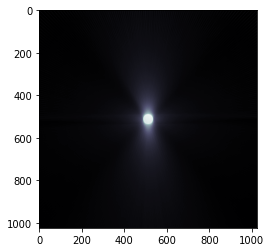

In [4]:
plt.imshow(reconstructed_image, cmap='bone')

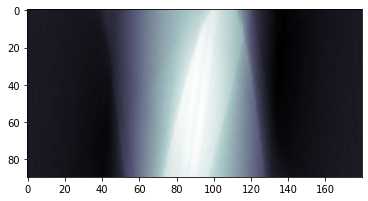

In [5]:
plt.imshow(sinogram, cmap='bone')

In [6]:
plt.figure(dpi=80)

<Figure size 480x320 with 0 Axes>

<Figure size 480x320 with 0 Axes>

In [7]:
@interact(x=(0,179))
def foo(x=0):
    f, ax = plt.subplots(1,3)
    f.set_figheight(15)
    f.set_figwidth(15)
    ax[0].imshow(image, cmap='bone')    
    ax[1].imshow(results[x], cmap='bone')    
    ax[2].imshow(sinograms[x], cmap='bone')
    
    for x in ax:
        x.axis('off')

SyntaxError: positional argument follows keyword argument (1472855114.py, line 1)

In [9]:
interact(preprocess.interactive_imgs, image=fixed(image), results=fixed(results), sinograms=fixed(sinograms), x=(0,179));

interactive(children=(IntSlider(value=0, description='x', max=179), Output()), _dom_classes=('widget-interact'…

In [ ]:
VBox([save_filename, patient_name, patient_id, image_comments])

In [ ]:
patient_data = {
    "PatientName": patient_name.value,
    "PatientID": patient_id.value,
    "ImageComments": image_comments.value
}

rec_file_name = "dicom_files\\" + save_filename.value
preprocess.save_as_dicom(rec_file_name, reconstructed_image, patient_data)

In [ ]:
rec_path = dirname + "\\" + rec_file_name
img, ds = preprocess.load_dicom_file(rec_path)
plt.imshow(img, cmap='bone')

In [ ]:
preprocess.patient_summary(ds)